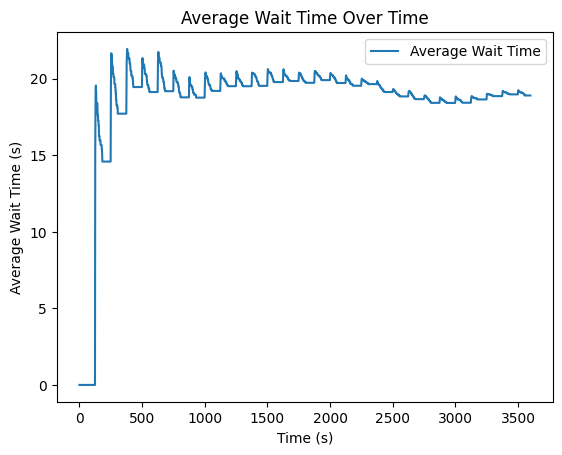

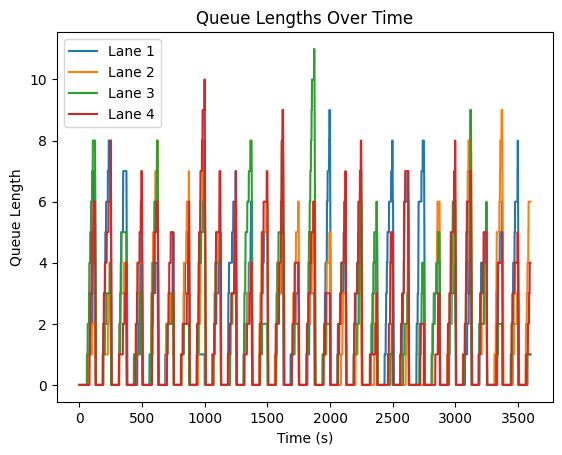

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Constants
NUM_LANES = 4
SIMULATION_TIME = 3600  # in seconds
ARRIVAL_RATE = 5  # vehicles per minute per lane
GREEN_LIGHT_DURATION = 60  # in seconds
YELLOW_LIGHT_DURATION = 5  # in seconds
RED_LIGHT_DURATION = 60  # in seconds

# Vehicle class
class Vehicle:
    def __init__(self, arrival_time): # Changed _init_ to __init__
        self.arrival_time = arrival_time
        self.wait_time = 0

# Traffic light class
class TrafficLight:
    def __init__(self): # Changed _init_ to __init__
        self.time = 0
        self.state = "GREEN"

    def update(self):
        if self.state == "GREEN" and self.time >= GREEN_LIGHT_DURATION:
            self.state = "YELLOW"
            self.time = 0
        elif self.state == "YELLOW" and self.time >= YELLOW_LIGHT_DURATION:
            self.state = "RED"
            self.time = 0
        elif self.state == "RED" and self.time >= RED_LIGHT_DURATION:
            self.state = "GREEN"
            self.time = 0
        self.time += 1

# Simulation function
def simulate_traffic():
    traffic_lights = [TrafficLight() for _ in range(NUM_LANES)]
    queues = [[] for _ in range(NUM_LANES)]
    total_wait_time = 0
    total_vehicles = 0

    wait_times = []
    queue_lengths = [[] for _ in range(NUM_LANES)]

    for t in range(SIMULATION_TIME):
        for lane in range(NUM_LANES):
            if random.random() < ARRIVAL_RATE / 60.0:
                queues[lane].append(Vehicle(t))

            traffic_lights[lane].update()

            if traffic_lights[lane].state == "GREEN" and queues[lane]:
                vehicle = queues[lane].pop(0)
                vehicle.wait_time = t - vehicle.arrival_time
                total_wait_time += vehicle.wait_time
                total_vehicles += 1

            queue_lengths[lane].append(len(queues[lane]))

        avg_wait_time = total_wait_time / total_vehicles if total_vehicles > 0 else 0
        wait_times.append(avg_wait_time)

    return avg_wait_time, total_vehicles, wait_times, queue_lengths

# Run simulation
average_wait_time, total_vehicles, wait_times, queue_lengths = simulate_traffic()

# Plot Average Wait Time Over Time
plt.figure()
plt.plot(range(SIMULATION_TIME), wait_times, label='Average Wait Time')
plt.xlabel('Time (s)')
plt.ylabel('Average Wait Time (s)')
plt.title('Average Wait Time Over Time')
plt.legend()
plt.show()

# Plot Queue Lengths Over Time for Each Lane
plt.figure()
for lane in range(NUM_LANES):
    plt.plot(range(SIMULATION_TIME), queue_lengths[lane], label=f'Lane {lane+1}')
plt.xlabel('Time (s)')
plt.ylabel('Queue Length')
plt.title('Queue Lengths Over Time')
plt.legend()
plt.show()